In [143]:
import numpy as np
import matplotlib.pyplot as plt
%precision 3
%matplotlib inline

In [144]:
x_set =np.array([1,2,3,4,5,6])

In [145]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [146]:
X = [x_set,f]

In [147]:
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))


{np.int64(1): 0.048,
 np.int64(2): 0.095,
 np.int64(3): 0.143,
 np.int64(4): 0.190,
 np.int64(5): 0.238,
 np.int64(6): 0.286}

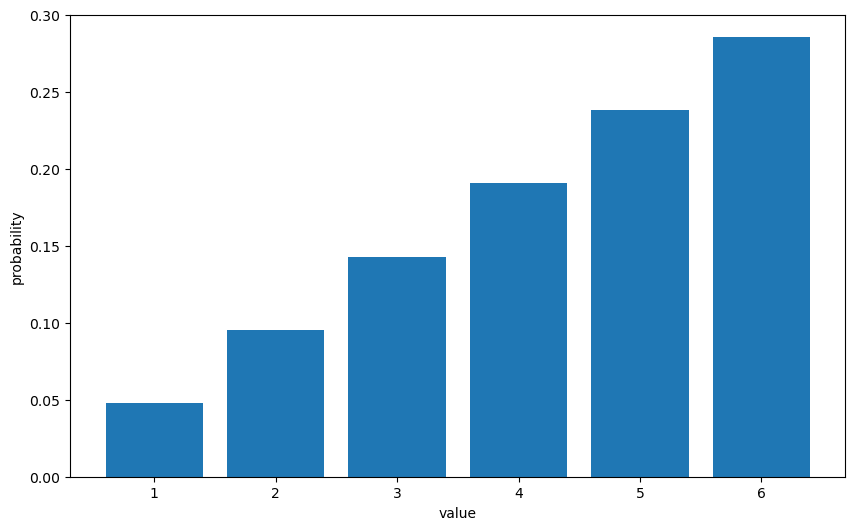

In [148]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [149]:
a = {'사과':1,'딸기':5,'귤':10}
a

{'사과': 1, '딸기': 5, '귤': 10}

In [150]:
a={('초콜릿',200):20, ('마카롱',500):15, ('쿠키',300):30}
a

{('초콜릿', 200): 20, ('마카롱', 500): 15, ('쿠키', 300): 30}

In [151]:
a={'사과':1,'딸기':5,'귤':10}
v1=a['딸기']
v1

5

In [152]:
v2=a['레몬']
v2

KeyError: '레몬'

In [153]:
f1='딸기' in a
f1
f2='레몬' not in a
f2
f3='레몬' in a
f3

False

In [154]:
v1 = a.get('딸기')
v1
v2=a.get('레몬')
v2

In [155]:
a={'초콜릿':1,'마카롱':2,'쿠키':3}
a['초콜릿']='One'
a['마카롱']='Two'
a['쿠키']='Three'
a

{'초콜릿': 'One', '마카롱': 'Two', '쿠키': 'Three'}

In [156]:
d=dict(초콜릿=20,마카롱=15,쿠키=30)
d

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [157]:
key = ['초콜릿','마카롱','쿠키']
value=[20,15,30]
d = dict(zip(key,value))
d


{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [158]:
d= dict([('초콜릿', 20),('마카롱',15),('쿠키',30)])
d    

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [159]:
np.all(prob>=0)

#모든 확률은 더하면 1이 됨

np.True_

In [160]:
np.sum(prob)

1.000

In [161]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
F(3)

0.286

In [162]:
y_set=np.array([2*x_k+3 for x_k in x_set])
prob=np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))


{np.int64(5): 0.048,
 np.int64(7): 0.095,
 np.int64(9): 0.143,
 np.int64(11): 0.190,
 np.int64(13): 0.238,
 np.int64(15): 0.286}

In [163]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [164]:
np.random.choice(5,5,replace=False)

array([3, 0, 4, 1, 2], dtype=int32)

In [165]:
np.random.choice(5,3,replace=False)

array([1, 3, 0], dtype=int32)

In [166]:
np.random.choice(5,10)

array([4, 1, 0, 1, 4, 1, 1, 3, 0, 0], dtype=int32)

In [167]:
np.random.choice(5,10,p=[0.1,0,0.3,0.6,0])
#선택확률을 다르게 해서 10개 선택



array([3, 3, 3, 3, 0, 3, 3, 3, 3, 2], dtype=int32)

In [168]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample) 
# 백만번 돌려서 평균한거랑 동일하다...

4.335

In [169]:
#lambda 함수... 
def E(X, g=lambda x: x):
    x_set, f =X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
E(X)

4.333

In [170]:
E(X,g=lambda x: 2*x +3)

11.667

In [171]:
2* E(X)+3

11.667

In [172]:
strings = ['hyeja', 'parkhyeja', 'youngtae','kimyoungtae','bbangtae']
strings.sort(key=lambda x: len(set(list(x))))


strings

['hyeja', 'bbangtae', 'parkhyeja', 'youngtae', 'kimyoungtae']

In [173]:
2*E(X)+3


11.667

In [174]:
mean = E(X)
np.sum([(
    x_k-mean)**2*f(x_k) for x_k in x_set])


2.222

In [175]:
def V(X, g=lambda x: x):
    x_set, f =X
    mean = E(X,g)
    return np.sum([(
        g(x_k)-mean)**2*f(x_k) for x_k in x_set])
V(X)



2.222

In [176]:
V(X, lambda x: 2*x + 3)

8.889

### 2**2*V(X)

x_set = np.arange(2,13)
y_set = no.arange(1,7)

In [177]:
def f_XY(x,y):
    if 1 <= y <=6 and 1<= x - y<= 6:
        return y * (x-y) / 441
    else:
        return 0 

In [178]:
XY = [x_set, y_set, f_XY]

In [179]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)

ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False)
ax.set_xticklabels(np.arange(1,7), minor = False)
ax.set_yticklabels(np.arange(2,13), minor = False)

ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (11).

In [180]:
np.all(prob >= 0)


np.True_

In [181]:
np.sum(prob)

0.011

In [182]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [183]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])
    

In [184]:
X= [x_set, f_x]
Y = [y_set, f_Y]



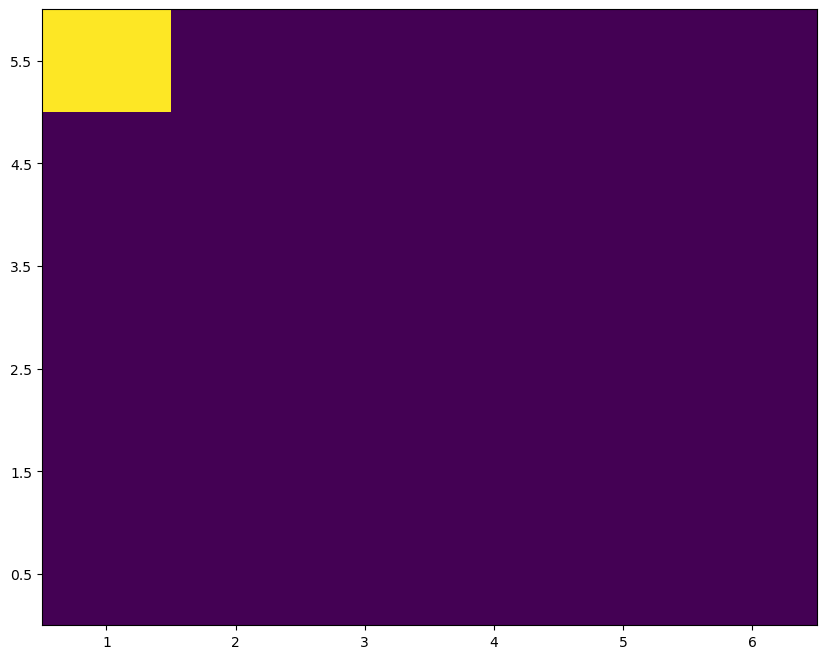

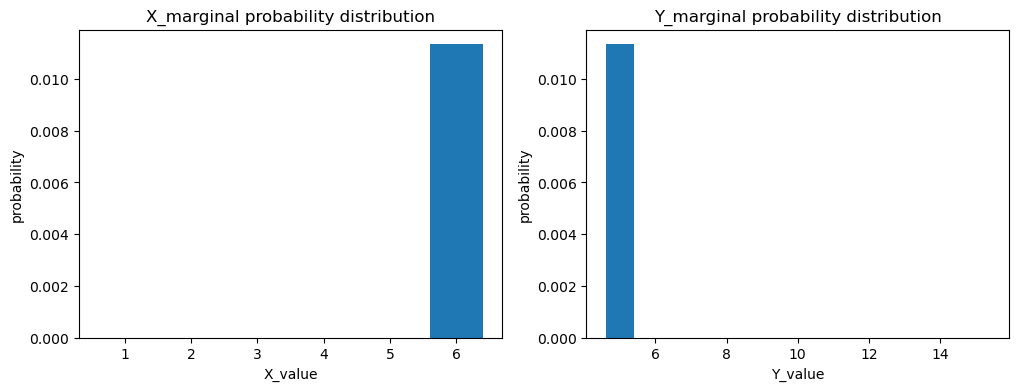

In [185]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [186]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

0.068

In [187]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set)

In [188]:
mean_X = E(XY, lambda x, y: x)
mean_X

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\678319840.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)


0.068

In [189]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\678319840.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)


0.057

In [190]:
a,b =2,3

In [191]:
E(XY, lambda x,y: a*x + b*y)

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\678319840.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)


0.306

In [192]:
a*mean_X + b*mean_y

NameError: name 'mean_y' is not defined

In [193]:
np.sum(((x_i - mean_X)**2 * f_X(x_i, y_j)
        for x_i in x_set for y_j in y_set))

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\406903922.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(((x_i - mean_X)**2 * f_X(x_i, y_j)


TypeError: f_X() takes 1 positional argument but 2 were given

In [194]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [195]:
var_X = V(XY, g=lambda x,y:x)
var_X

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\678319840.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)


0.399

In [196]:
var_Y  = V(XY, g=lambda x, y:y)
var_Y

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\678319840.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)


0.277

In [197]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

cov_xy = Cov(XY)
cov_xy

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\678319840.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)


0.332

In [198]:
V(XY, lambda x,y: a*x+b*y)

C:\Users\jjuin\AppData\Local\Temp\ipykernel_15556\678319840.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_i, y_j) * f_XY(x_i, y_j)


8.079

In [199]:
a**2*var_X + b**2 *var_Y + 2*a*b*cov_xy

8.079

In [200]:
cov_xy / np.sqrt(var_X * var_Y)

1.000